**Training the model by Keras NLP**

Reading Dataset

In [ ]:
import pandas
data_set = pandas.read_csv("dialect_dataset_cleaned.csv",encoding ='utf-16')

from sklearn.preprocessing import LabelEncoder
x = list(map(str, data_set['text']) )
y = LabelEncoder().fit_transform(data_set['dialect'])

Data reprocessing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 600000, oov_token="<OOV>")
tokenizer.fit_on_texts(x)

x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, padding='post', maxlen=80)

from sklearn.model_selection import train_test_split as split
xTrain , xTest , yTrain , yTest = split (x , y , test_size=.2)

The Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM , Bidirectional
from keras.layers.embeddings import Embedding
from keras.layers.core import Dense
model = Sequential([
        Embedding(600000,80, input_length=80 ),
        Bidirectional(LSTM(50)),
        Dense(18, activation='softmax')
        ])
model.compile ( loss='sparse_categorical_crossentropy' , optimizer='RMSprop' , metrics=['accuracy'] )
model.summary()
history = model.fit(xTrain , yTrain , epochs=3 , batch_size=256 , validation_data= (xTest,yTest) )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 80)            48000000  
                                                                 
 bidirectional (Bidirectiona  (None, 100)              52400     
 l)                                                              
                                                                 
 dense (Dense)               (None, 18)                1818      
                                                                 
Total params: 48,054,218
Trainable params: 48,054,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1432/1432 [==============================] - 723s 502ms/step - loss: 2.0826 - accuracy: 0.3372 - val_loss: 1.7491 - val_accuracy: 0.4428
Epoch 2/3
1432/1432 [==============================] - 775s 541ms/step - loss: 1.5237 - accurac

Model performance

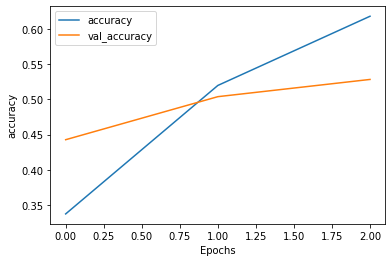

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

Test the Model by unknown instance

In [ ]:
input_sentence= input(" Enter your test case ")

#Text cleaning by regex to replace all bits except arabic letters by spaces
#remove [ English letters , numbers , special characters , ... ] as They not affect on The dialect
import re
match = r'[^\u0020\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD]+'
input_sentence = re.sub(match ,' ', input_sentence)

input_sentence = ' '.join(input_sentence.split()) #replace spaces by only 1 space

input_sentence = tokenizer.texts_to_sequences([input_sentence])
input_sentence = pad_sequences(input_sentence, padding='post', maxlen=80)

from numpy.ma.core import argmax
encoder = LabelEncoder().fit(data_set['dialect'])

predict = model.predict(input_sentence) #vector[18]
print( encoder.inverse_transform ([ argmax(predict) ]) [0]  +" with probability = "+  str(max( predict[0] ))  ) # Model output